In [1]:

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [6]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X = train_data.drop('label', axis=1)
y = train_data['label']

X = X/255

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.layers import Dense, Flatten
from keras.models import Sequential

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape[0]

33600

In [10]:
X_val.shape[0]

8400

/tmp/ipykernel_30/268370013.py:4: DeprecationWarning: This function is deprecated. Please call randint(1, 42000 + 1) instead
  random_index=np.random.random_integers(len(X))


<function matplotlib.pyplot.show(close=None, block=None)>

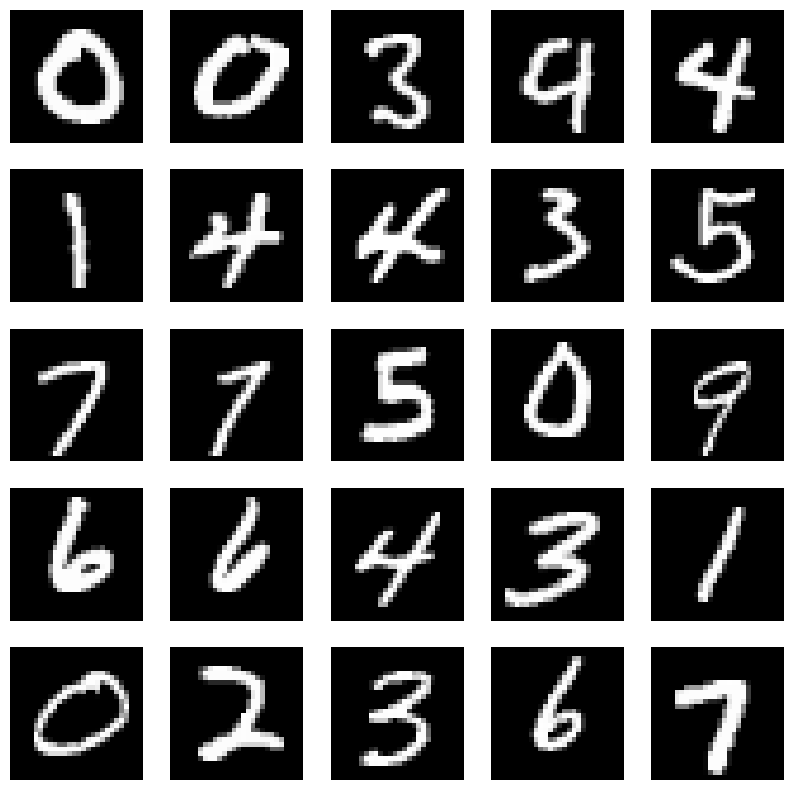

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    random_index=np.random.random_integers(len(X))
    plt.imshow(X.values[random_index].reshape(28,28),cmap='gray')
    plt.axis('off')
plt.show


In [14]:
model = Sequential()
model.add(Flatten(input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
history = model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=10, batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8471 - loss: 0.5300 - val_accuracy: 0.9442 - val_loss: 0.1949
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9545 - loss: 0.1559 - val_accuracy: 0.9593 - val_loss: 0.1408
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9695 - loss: 0.1042 - val_accuracy: 0.9642 - val_loss: 0.1199
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9782 - loss: 0.0746 - val_accuracy: 0.9668 - val_loss: 0.1131
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9830 - loss: 0.0569 - val_accuracy: 0.9676 - val_loss: 0.1072
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9874 - loss: 0.0429 - val_accuracy: 0.9675 - val_loss: 0.1077
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9911 - loss: 0.0324 - val_accuracy: 0.9685 - val_loss: 0.1047
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9920 - loss: 0.0267 - 

In [16]:
val_loss,val_accuracy = model.evaluate(X_val,y_val)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.1108


In [17]:
val_loss

0.10168753564357758

In [18]:
val_accuracy

0.9730952382087708

In [19]:
test_data = test_data/255
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions,axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [20]:
submission = pd.DataFrame({
    'ImageID':range(1,len(predicted_labels)+1),
    'Label':predicted_labels
})

In [ ]:
submission.to_csv('submission.csv',index=False)